In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import spearmanr


In [76]:
# Cargamos los datos

df = pd.read_csv('C:/Users/natal/OneDrive/Documentos/U/2024-2/Analitica/Proyecto 3/datos_limpios_dummies.csv',encoding="latin1")



In [77]:
# Mostrar información general 
#Que tipo de datos tenemos?
print("Información del DataFrame:")
print(df.info())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147835 entries, 0 to 147834
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   periodo                   147835 non-null  int64  
 1   estu_tipodocumento        147835 non-null  object 
 2   cole_area_ubicacion       147835 non-null  object 
 3   cole_calendario           147835 non-null  object 
 4   cole_caracter             147835 non-null  object 
 5   cole_depto_ubicacion      147835 non-null  object 
 6   cole_genero               147835 non-null  object 
 7   cole_jornada              147835 non-null  object 
 8   estu_genero               147835 non-null  object 
 9   fami_educacionmadre       147835 non-null  object 
 10  fami_educacionpadre       147835 non-null  object 
 11  fami_estratovivienda      147835 non-null  int64  
 12  punt_ingles               147835 non-null  float64
 13  punt_matematicas 

In [78]:
#Hay faltantes?
df.isnull().any()

periodo                     False
estu_tipodocumento          False
cole_area_ubicacion         False
cole_calendario             False
cole_caracter               False
cole_depto_ubicacion        False
cole_genero                 False
cole_jornada                False
estu_genero                 False
fami_educacionmadre         False
fami_educacionpadre         False
fami_estratovivienda        False
punt_ingles                 False
punt_matematicas            False
punt_sociales_ciudadanas    False
punt_c_naturales            False
punt_lectura_critica        False
punt_global                 False
cole_bilingue_S             False
fami_tieneautomovil_Si      False
fami_tienecomputador_Si     False
fami_tieneinternet_Si       False
fami_tienelavadora_Si       False
dtype: bool

In [79]:
# Estadísticas descriptivas para variables numéricas 

#Periodo, Estrato de la familia, Puntaje ingles, Puntaje Matematicas, Puntaje Sociales, Puntaje Ciencias naturales
#puntaje lectura critica y puntaje global 
print("\nEstadísticas descriptivas (variables numéricas):")
print(df.describe())


Estadísticas descriptivas (variables numéricas):
             periodo  fami_estratovivienda    punt_ingles  punt_matematicas  \
count  147835.000000         147835.000000  147835.000000     147835.000000   
mean    20135.289248              1.441715      43.145967         44.200648   
std        31.327182              0.792212       6.980564          8.932845   
min     20101.000000              1.000000      23.000000         15.670000   
25%     20112.000000              1.000000      39.000000         39.000000   
50%     20131.000000              1.000000      43.000000         44.000000   
75%     20152.000000              2.000000      47.150000         50.000000   
max     20224.000000              6.000000      66.440000         75.410000   

       punt_sociales_ciudadanas  punt_c_naturales  punt_lectura_critica  \
count             147835.000000     147835.000000         147835.000000   
mean                  44.048615         45.905070             47.825704   
std          

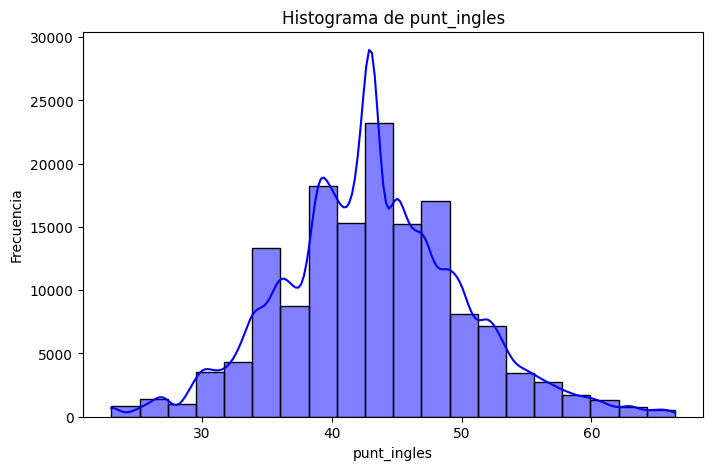

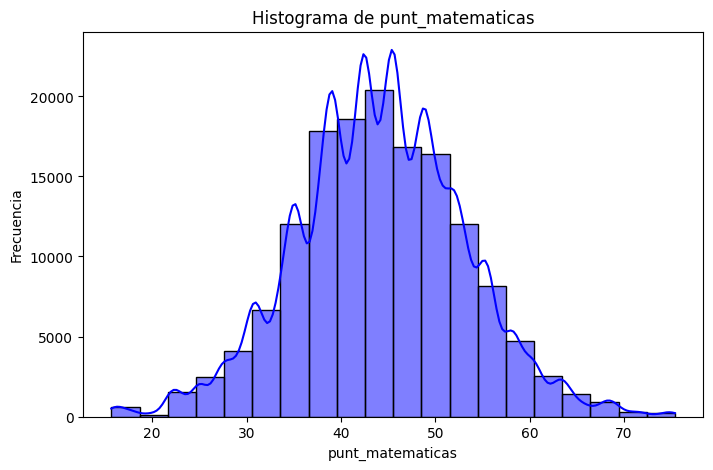

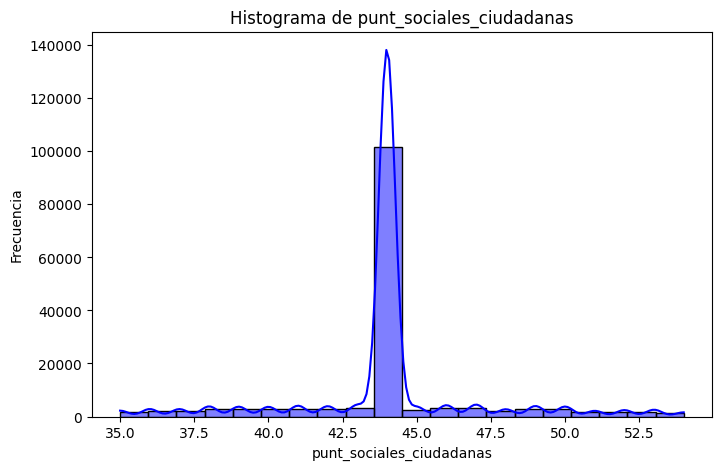

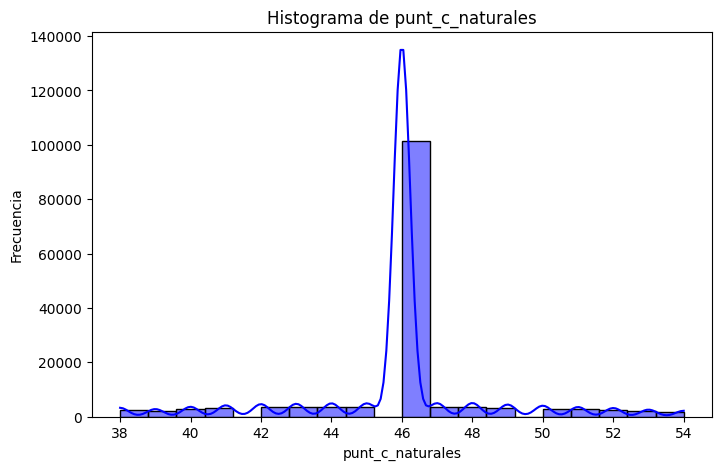

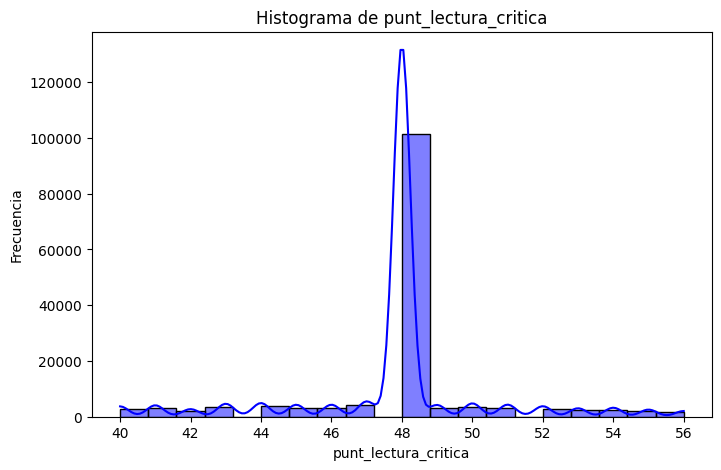

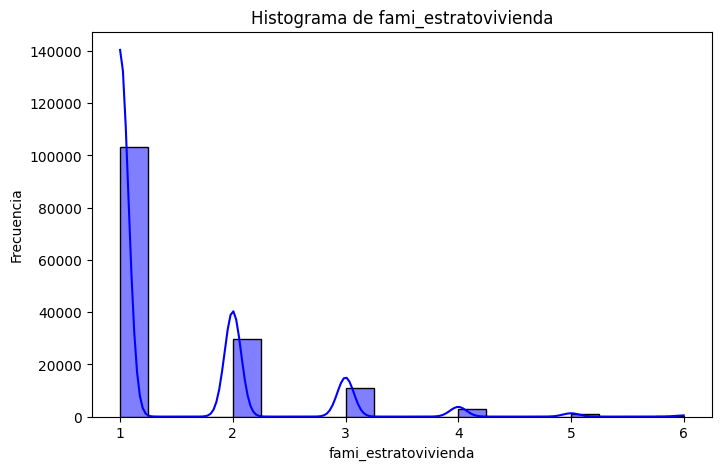

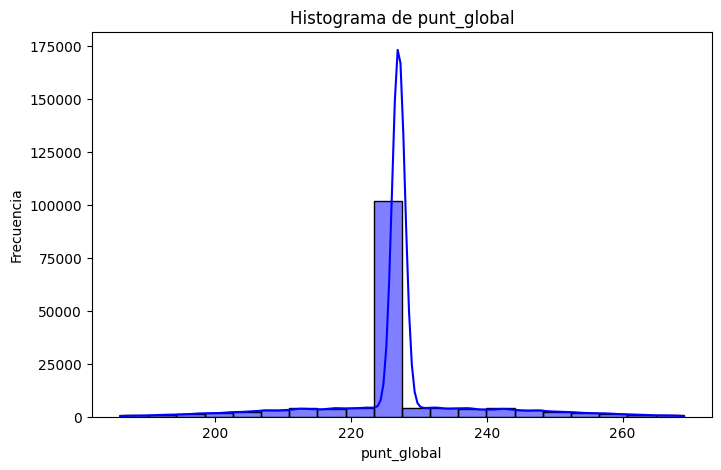

In [111]:
# Histograma para puntajes numéricos
num_cols = ['punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 
            'punt_c_naturales', 'punt_lectura_critica','fami_estratovivienda', 'punt_global']
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=20, color="blue")
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

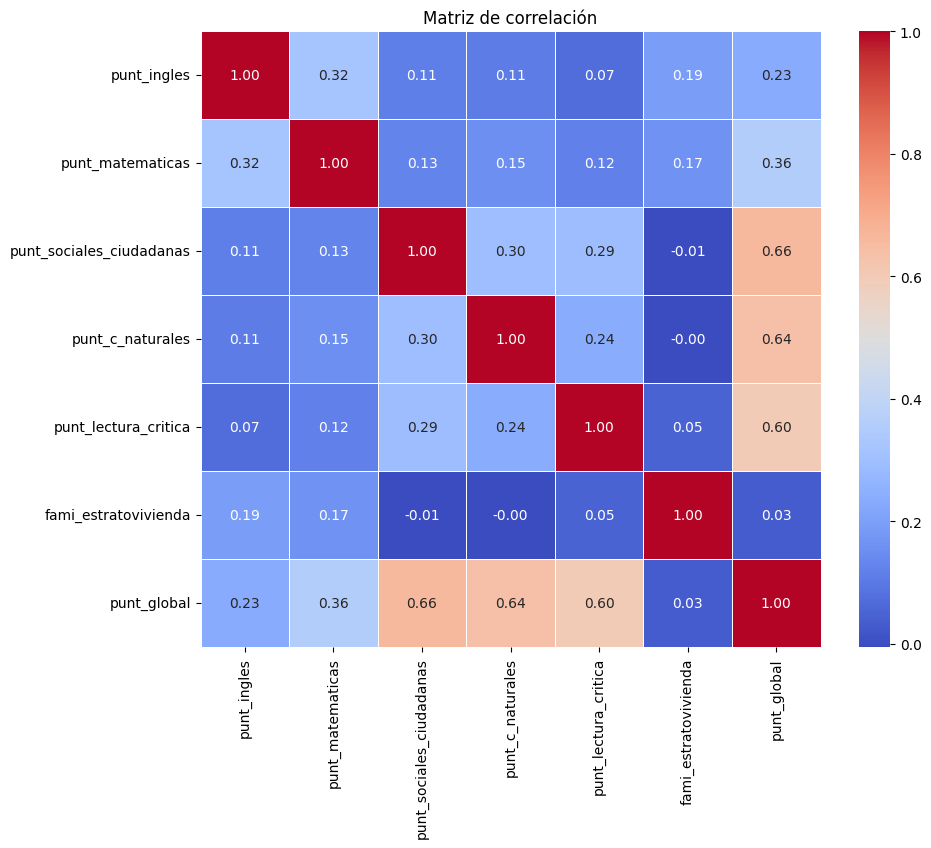

In [112]:
# Matriz de correlación para variables numéricas
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

Variables Categoricas

C:\Users\natal\AppData\Local\Temp\ipykernel_11552\175144900.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')
C:\Users\natal\AppData\Local\Temp\ipykernel_11552\175144900.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')
C:\Users\natal\AppData\Local\Temp\ipykernel_11552\175144900.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette=

ValueError: num must be an integer with 1 <= num <= 8, not 9

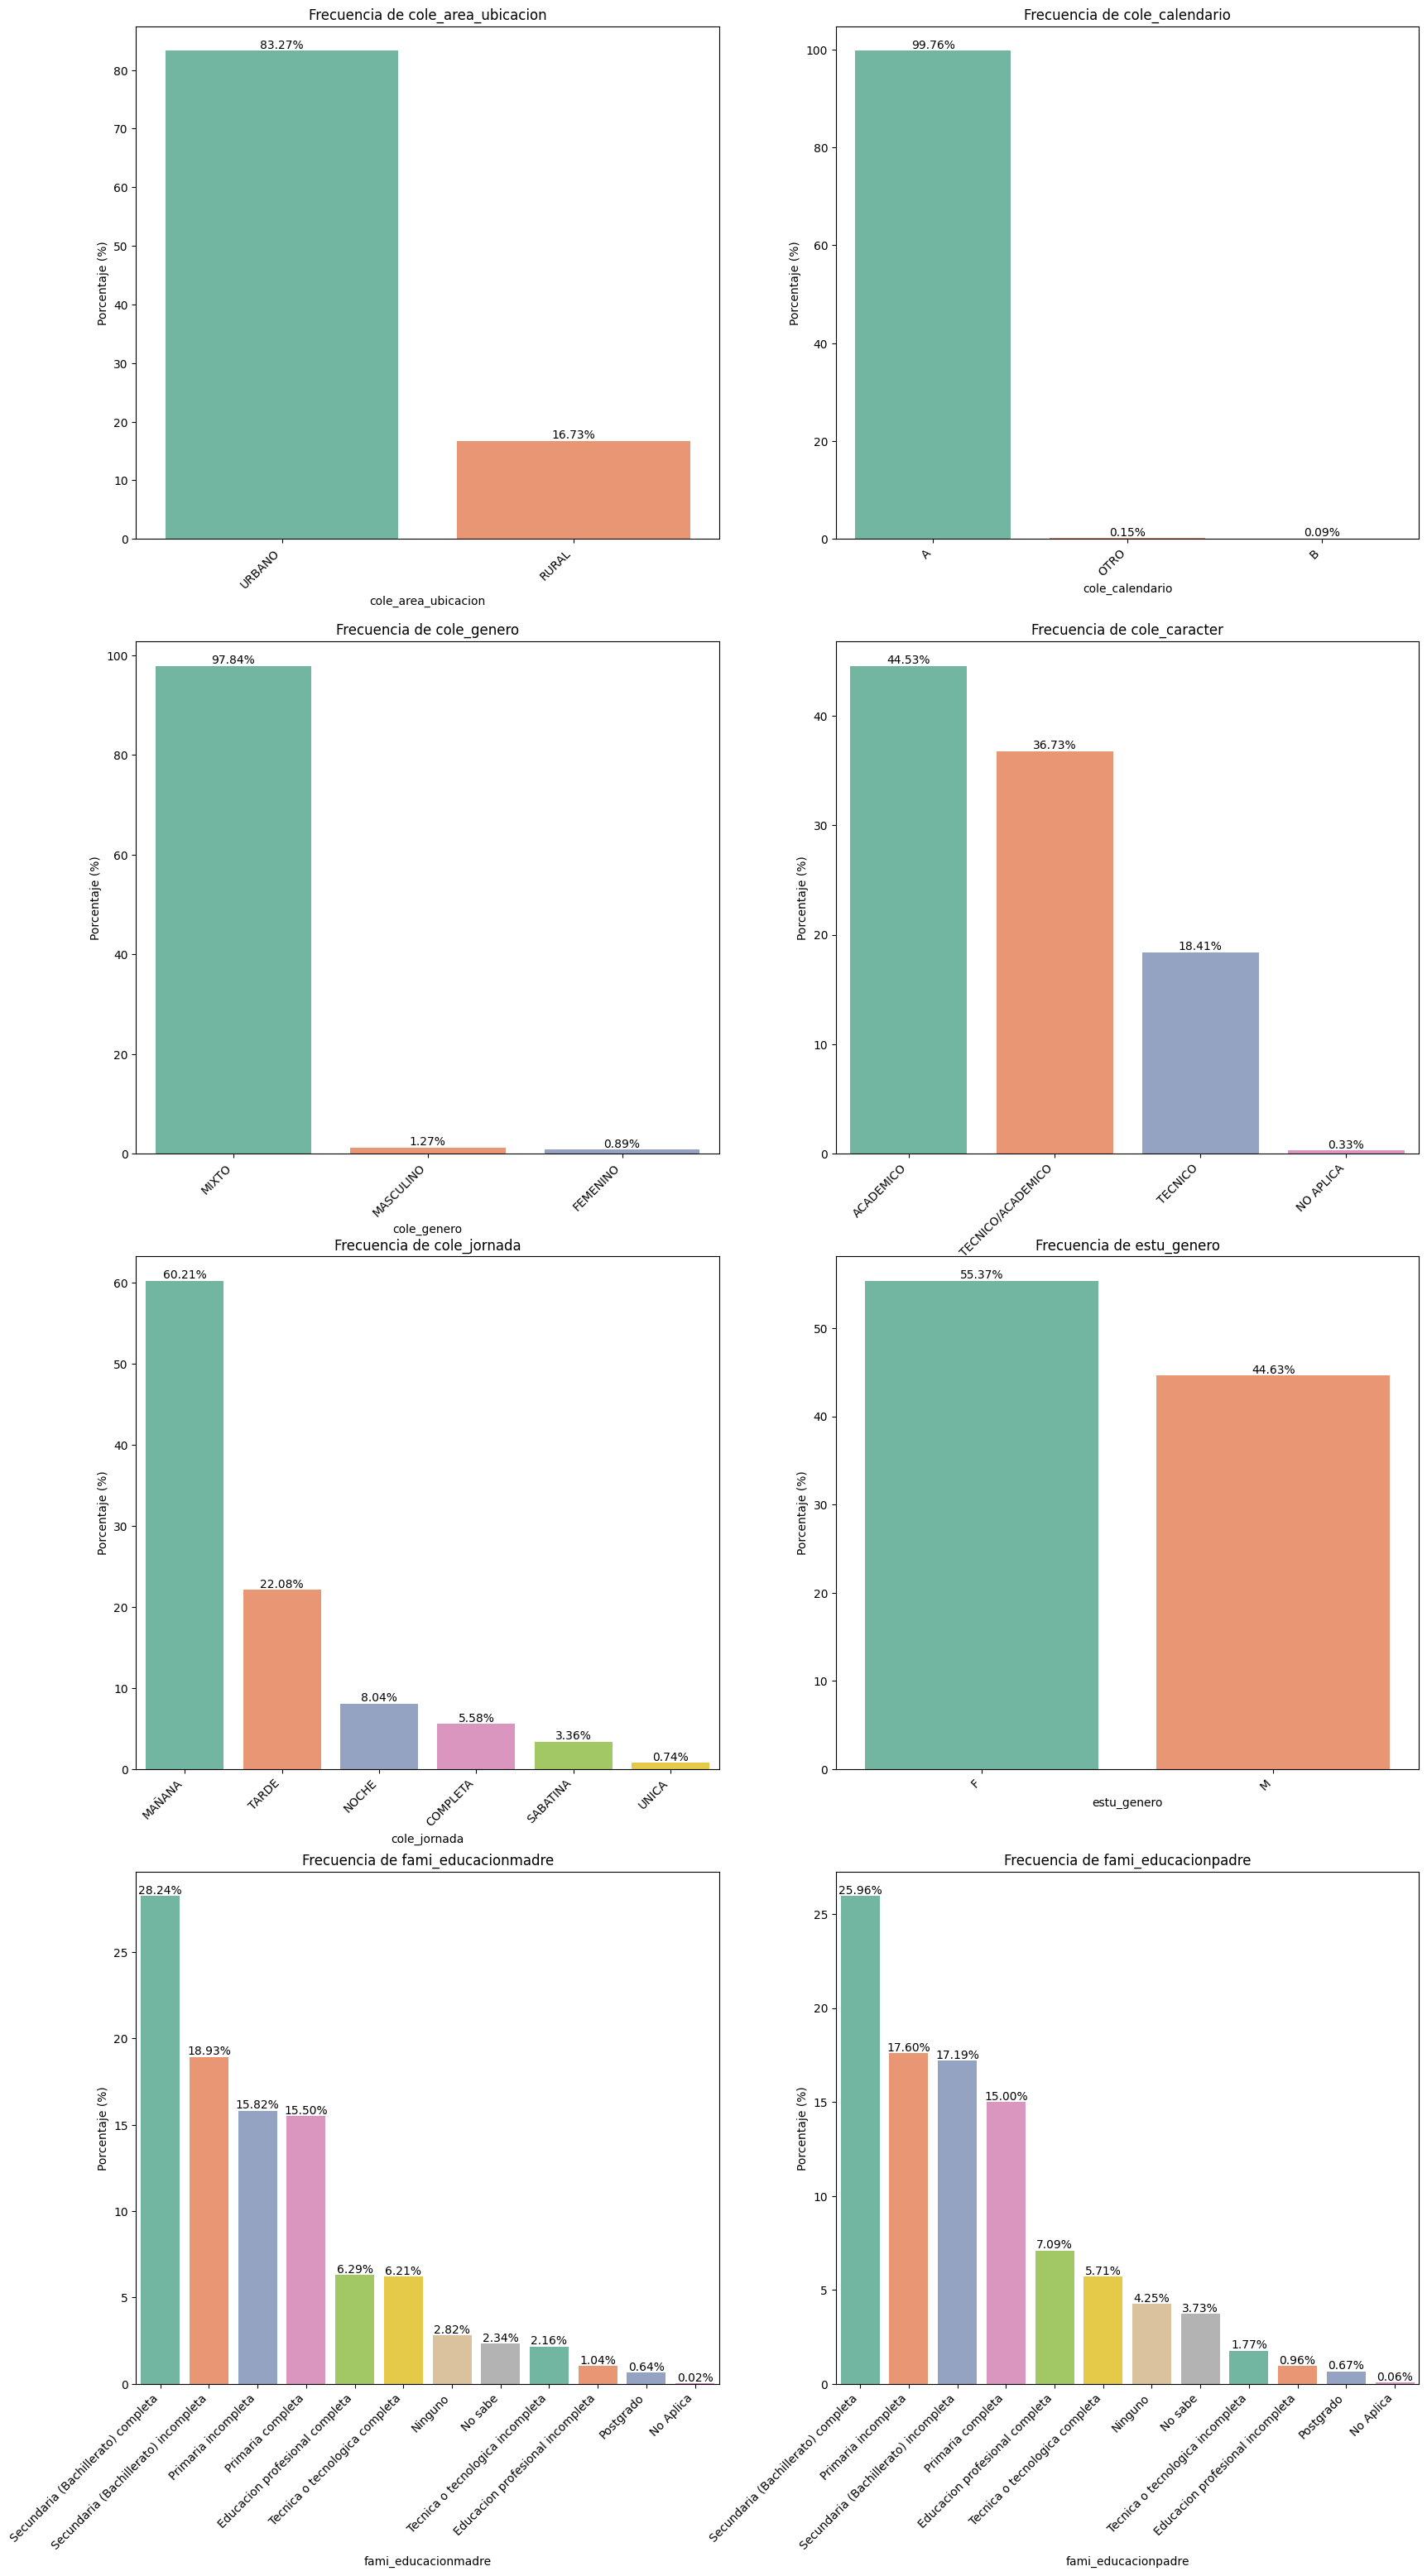

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir las columnas categóricas
categorical_columns = [
    'cole_area_ubicacion', 'cole_calendario', 'cole_genero', 'cole_caracter', 
    'cole_jornada', 'estu_genero', 'fami_educacionmadre', 'fami_educacionpadre', 
    'fami_estratovivienda', 'cole_bilingue_Si', 'fami_tieneautomovil_Si', 
    'fami_tienecomputador_Si', 'fami_tieneinternet_Si', 'fami_tienelavadora_Si'
]

# Tamaño de la figura para que los gráficos no se solapen
plt.figure(figsize=(20,37))

# Graficar la frecuencia de cada variable categórica
for i, column in enumerate(categorical_columns, 1):
    # Establecer la posición para cada subgráfico (2 columnas por fila)
    plt.subplot(len(categorical_columns)//3, 2, i)
    
    # Calcular el porcentaje de cada categoría
    category_counts = df[column].value_counts(normalize=True) * 100
    
    # Crear el gráfico de barras
    ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')
    plt.title(f'Frecuencia de {column}')
    plt.xlabel(column)
    plt.ylabel('Porcentaje (%)')
    
    # Añadir las etiquetas de porcentaje sobre las barras
    for p in ax.patches:
        percentage = f'{p.get_height():.2f}%'  # Formato de porcentaje
        ax.annotate(
            percentage,  # Etiqueta con el porcentaje
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Coordenadas de la etiqueta
            ha='center', va='center',  # Alinear el texto
            fontsize=10, color='black',  # Opcional: ajustar el tamaño y color de la fuente
            xytext=(0, 5),  # Desplazar el texto un poco arriba de la barra
            textcoords='offset points'
        )
    
    # Rotar las etiquetas del eje X si son largas
    plt.xticks(rotation=45, ha='right')

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()


C:\Users\natal\AppData\Local\Temp\ipykernel_11552\667484960.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=var, y='punt_global', palette="Set2")
C:\Users\natal\AppData\Local\Temp\ipykernel_11552\667484960.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=var, y='punt_global', palette="Set2")
C:\Users\natal\AppData\Local\Temp\ipykernel_11552\667484960.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=var, y='punt_global', palette="Set2")
C:\Users\natal\AppData\Local\Temp\ipykernel_11552\66

ValueError: num must be an integer with 1 <= num <= 6, not 7

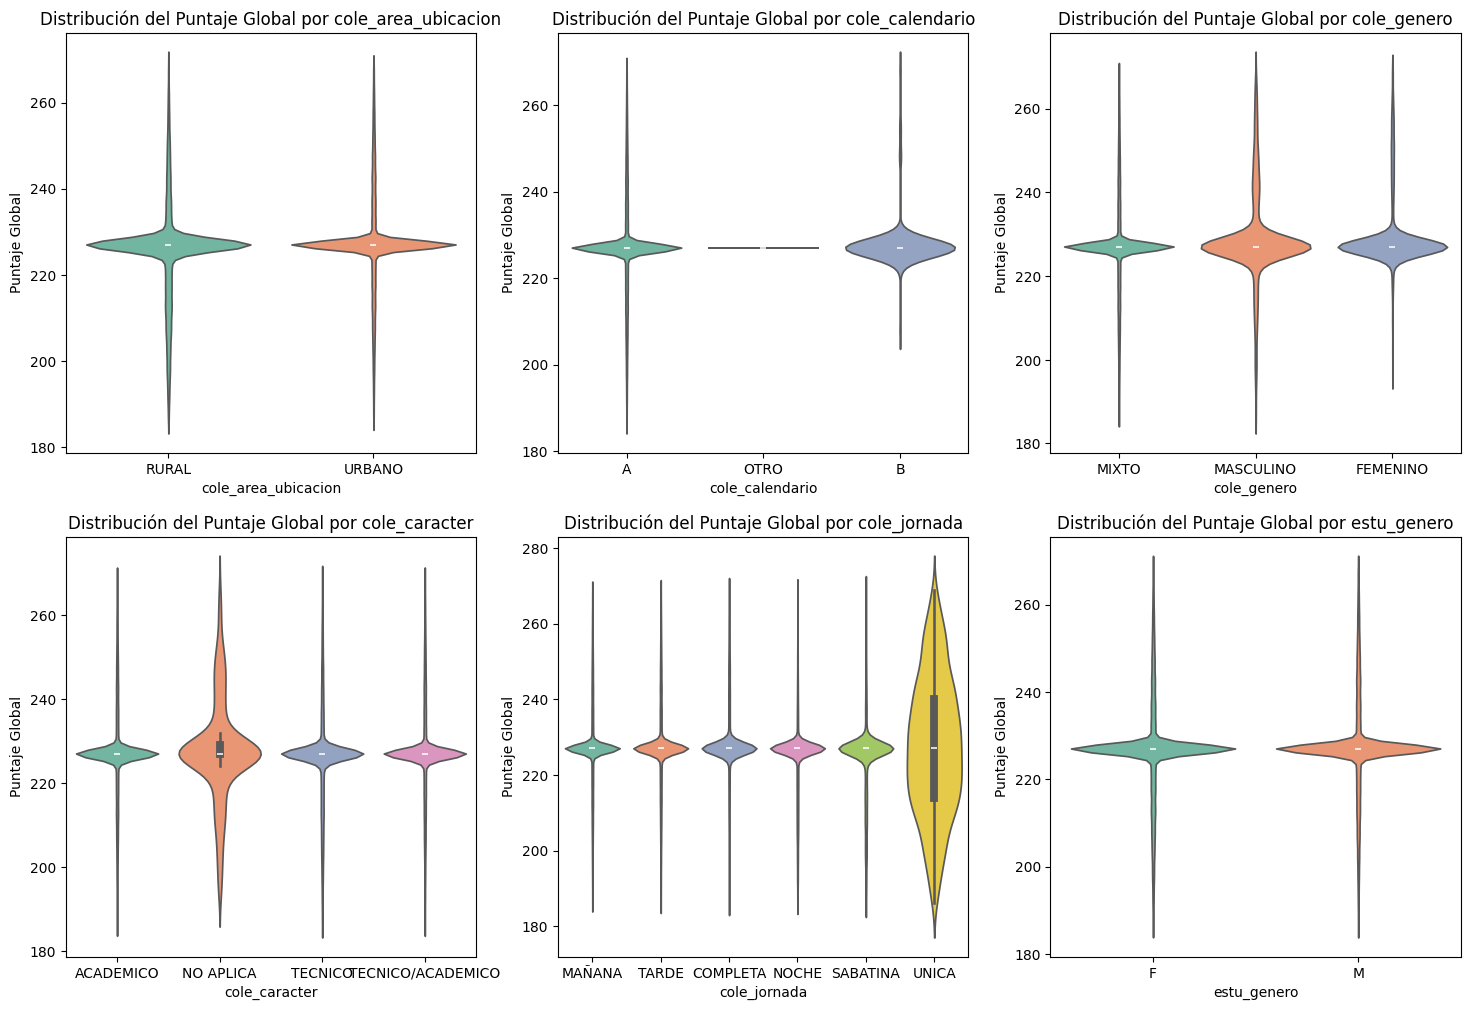

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables para análisis
variables = [    'cole_area_ubicacion', 'cole_calendario', 'cole_genero', 'cole_caracter', 
    'cole_jornada', 'estu_genero', 'fami_educacionmadre', 'fami_educacionpadre', 
    'fami_estratovivienda', 'cole_bilingue_Si', 'fami_tieneautomovil_Si', 
    'fami_tienecomputador_Si', 'fami_tieneinternet_Si', 'fami_tienelavadora_Si']

# Tamaño de la figura
plt.figure(figsize=(18, 12))

# Crear un gráfico de violín para cada variable
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)  # Usamos 2 filas y 3 columnas para acomodar los gráficos
    sns.violinplot(data=df, x=var, y='punt_global', palette="Set2")
    plt.title(f'Distribución del Puntaje Global por {var}')
    plt.xlabel(var)
    plt.ylabel('Puntaje Global')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


C:\Users\natal\AppData\Local\Temp\ipykernel_11552\3256788071.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=var, y='punt_global', palette="Set2")
C:\Users\natal\AppData\Local\Temp\ipykernel_11552\3256788071.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=var, y='punt_global', palette="Set2")


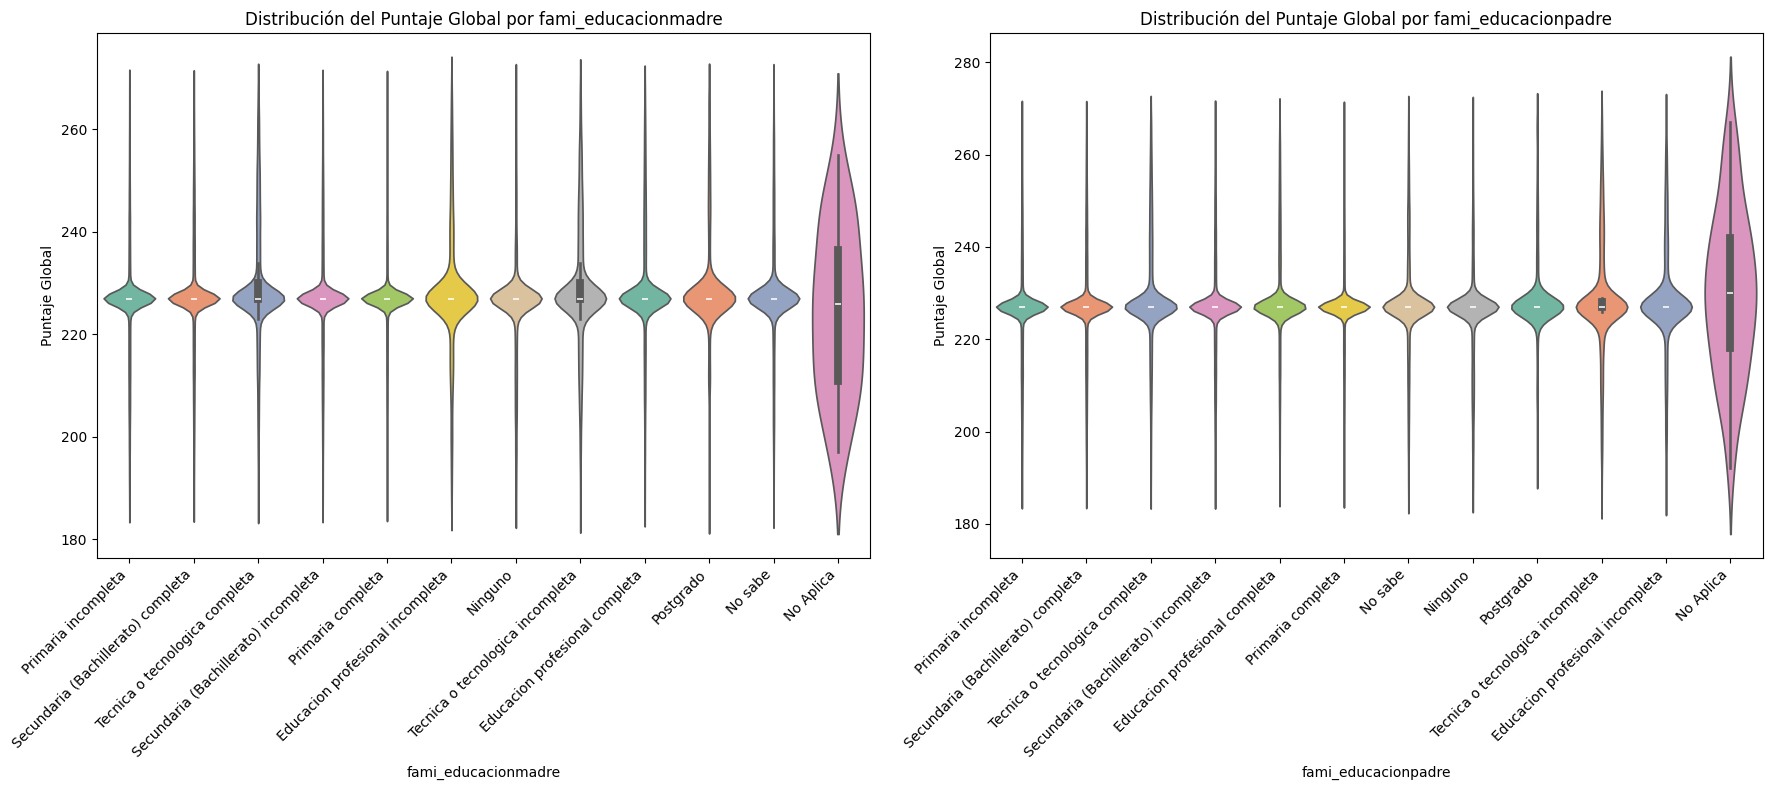

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables para análisis
variables = [  'fami_educacionmadre', 'fami_educacionpadre']

# Tamaño de la figura
plt.figure(figsize=(18, 8))  # Hacemos la figura más alargada

# Crear un gráfico de violín para cada variable
for i, var in enumerate(variables, 1):
    plt.subplot(1, 2, i)  # Usamos 1 fila y 2 columnas para acomodar los gráficos
    sns.violinplot(data=df, x=var, y='punt_global', palette="Set2")
    plt.title(f'Distribución del Puntaje Global por {var}')
    plt.xlabel(var)
    plt.ylabel('Puntaje Global')
    plt.xticks(rotation=45, ha='right')  # Rotamos las etiquetas del eje x para mejor visibilidad

# Mostrar los gráficos
plt.tight_layout()
plt.show()


C:\Users\natal\AppData\Local\Temp\ipykernel_11552\1979433143.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')
C:\Users\natal\AppData\Local\Temp\ipykernel_11552\1979433143.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')
C:\Users\natal\AppData\Local\Temp\ipykernel_11552\1979433143.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palet

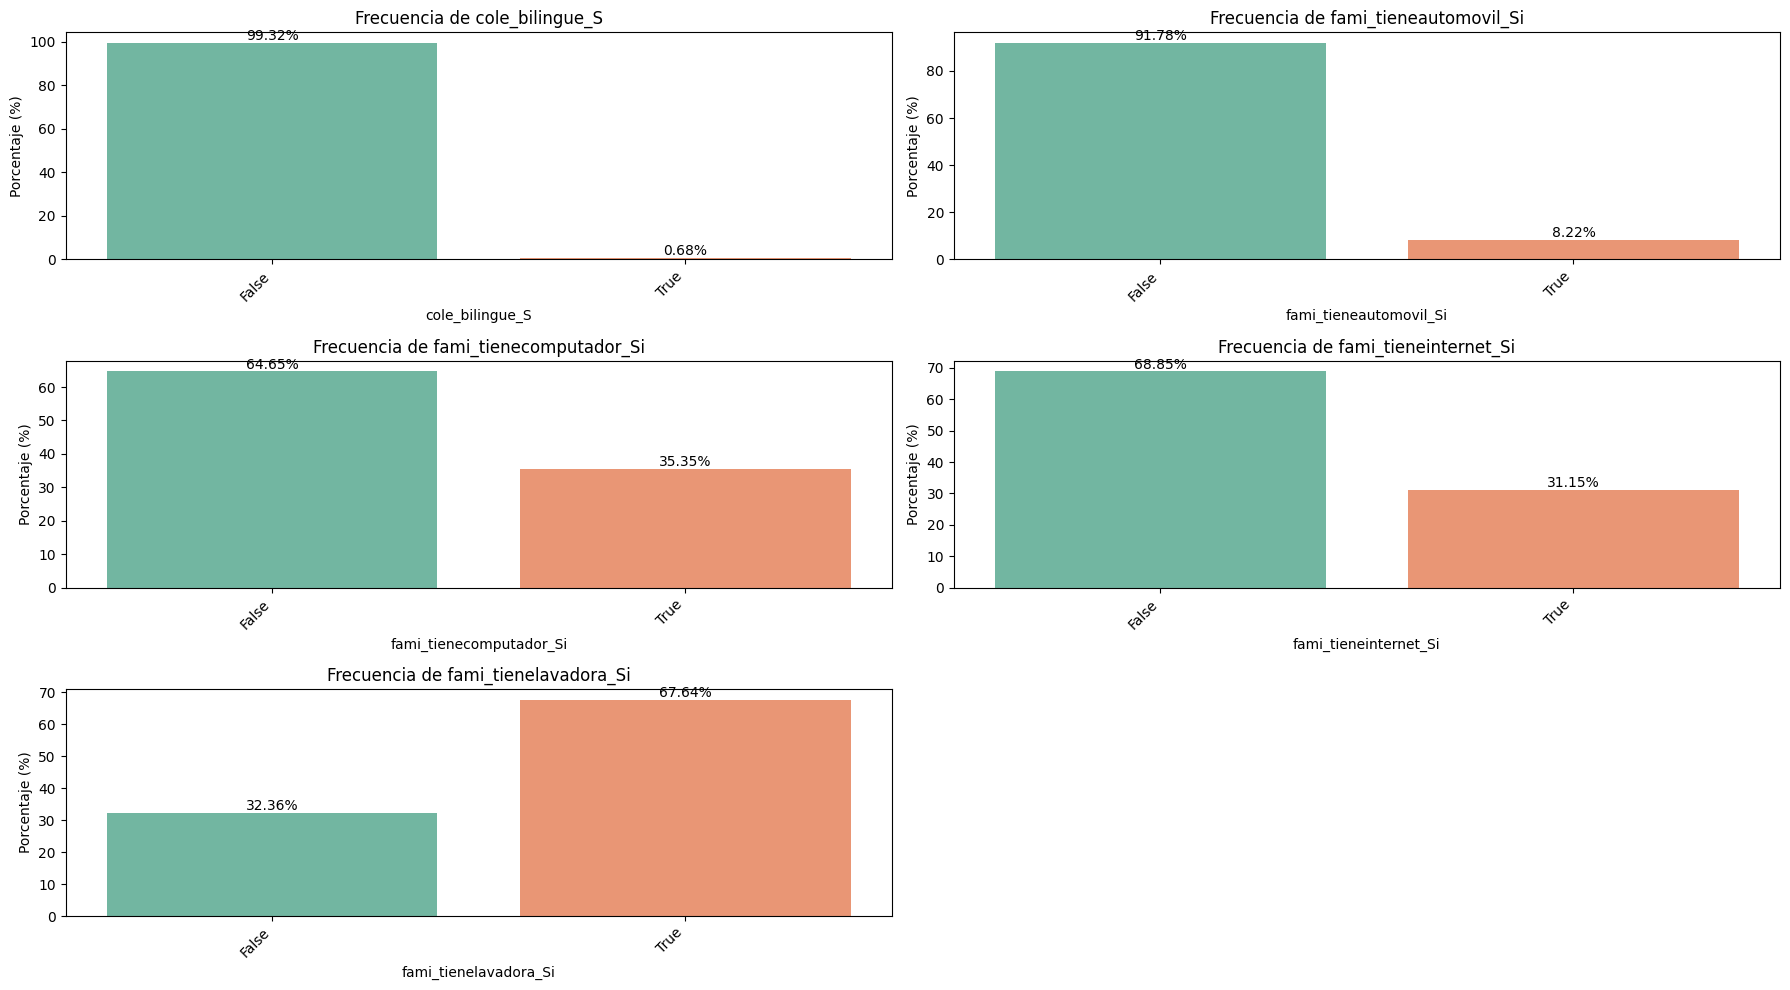

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir las columnas booleanas específicas
boolean_columns = [
    'cole_bilingue_S', 'fami_tieneautomovil_Si', 
    'fami_tienecomputador_Si', 'fami_tieneinternet_Si', 'fami_tienelavadora_Si'
]

# Asegurarse de que las columnas sean booleanas, y manejar valores nulos
for column in boolean_columns:
    # Convertir a booleano si no lo es (True/False)
    df[column] = df[column].astype('bool', errors='ignore')  # 'ignore' para dejar intactos los valores que ya sean booleanos

# Tamaño de la figura para que los gráficos no se solapen
plt.figure(figsize=(18, 10))

# Graficar la frecuencia de cada variable booleana
for i, column in enumerate(boolean_columns, 1):
    # Establecer la posición para cada subgráfico (2 columnas por fila)
    plt.subplot(3, 2, i)  # Ajustado a 3 filas y 2 columnas
    
    # Calcular el porcentaje de True (1) y False (0)
    category_counts = df[column].value_counts(normalize=True) * 100
    
    # Crear el gráfico de barras
    ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')
    plt.title(f'Frecuencia de {column}')
    plt.xlabel(column)
    plt.ylabel('Porcentaje (%)')
    
    # Añadir las etiquetas de porcentaje sobre las barras
    for p in ax.patches:
        percentage = f'{p.get_height():.2f}%'  # Formato de porcentaje
        ax.annotate(
            percentage,  # Etiqueta con el porcentaje
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Coordenadas de la etiqueta
            ha='center', va='center',  # Alinear el texto
            fontsize=10, color='black',  # Opcional: ajustar el tamaño y color de la fuente
            xytext=(0, 5),  # Desplazar el texto un poco arriba de la barra
            textcoords='offset points'
        )
    
    # Rotar las etiquetas del eje X si son largas
    plt.xticks(rotation=45, ha='right')

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()


C:\Users\natal\AppData\Local\Temp\ipykernel_11552\3271273468.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=column, y='punt_global', data=df, inner='quart', palette='Set2')
C:\Users\natal\AppData\Local\Temp\ipykernel_11552\3271273468.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=column, y='punt_global', data=df, inner='quart', palette='Set2')
C:\Users\natal\AppData\Local\Temp\ipykernel_11552\3271273468.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=column, y='punt_global', data=df, inner='quar

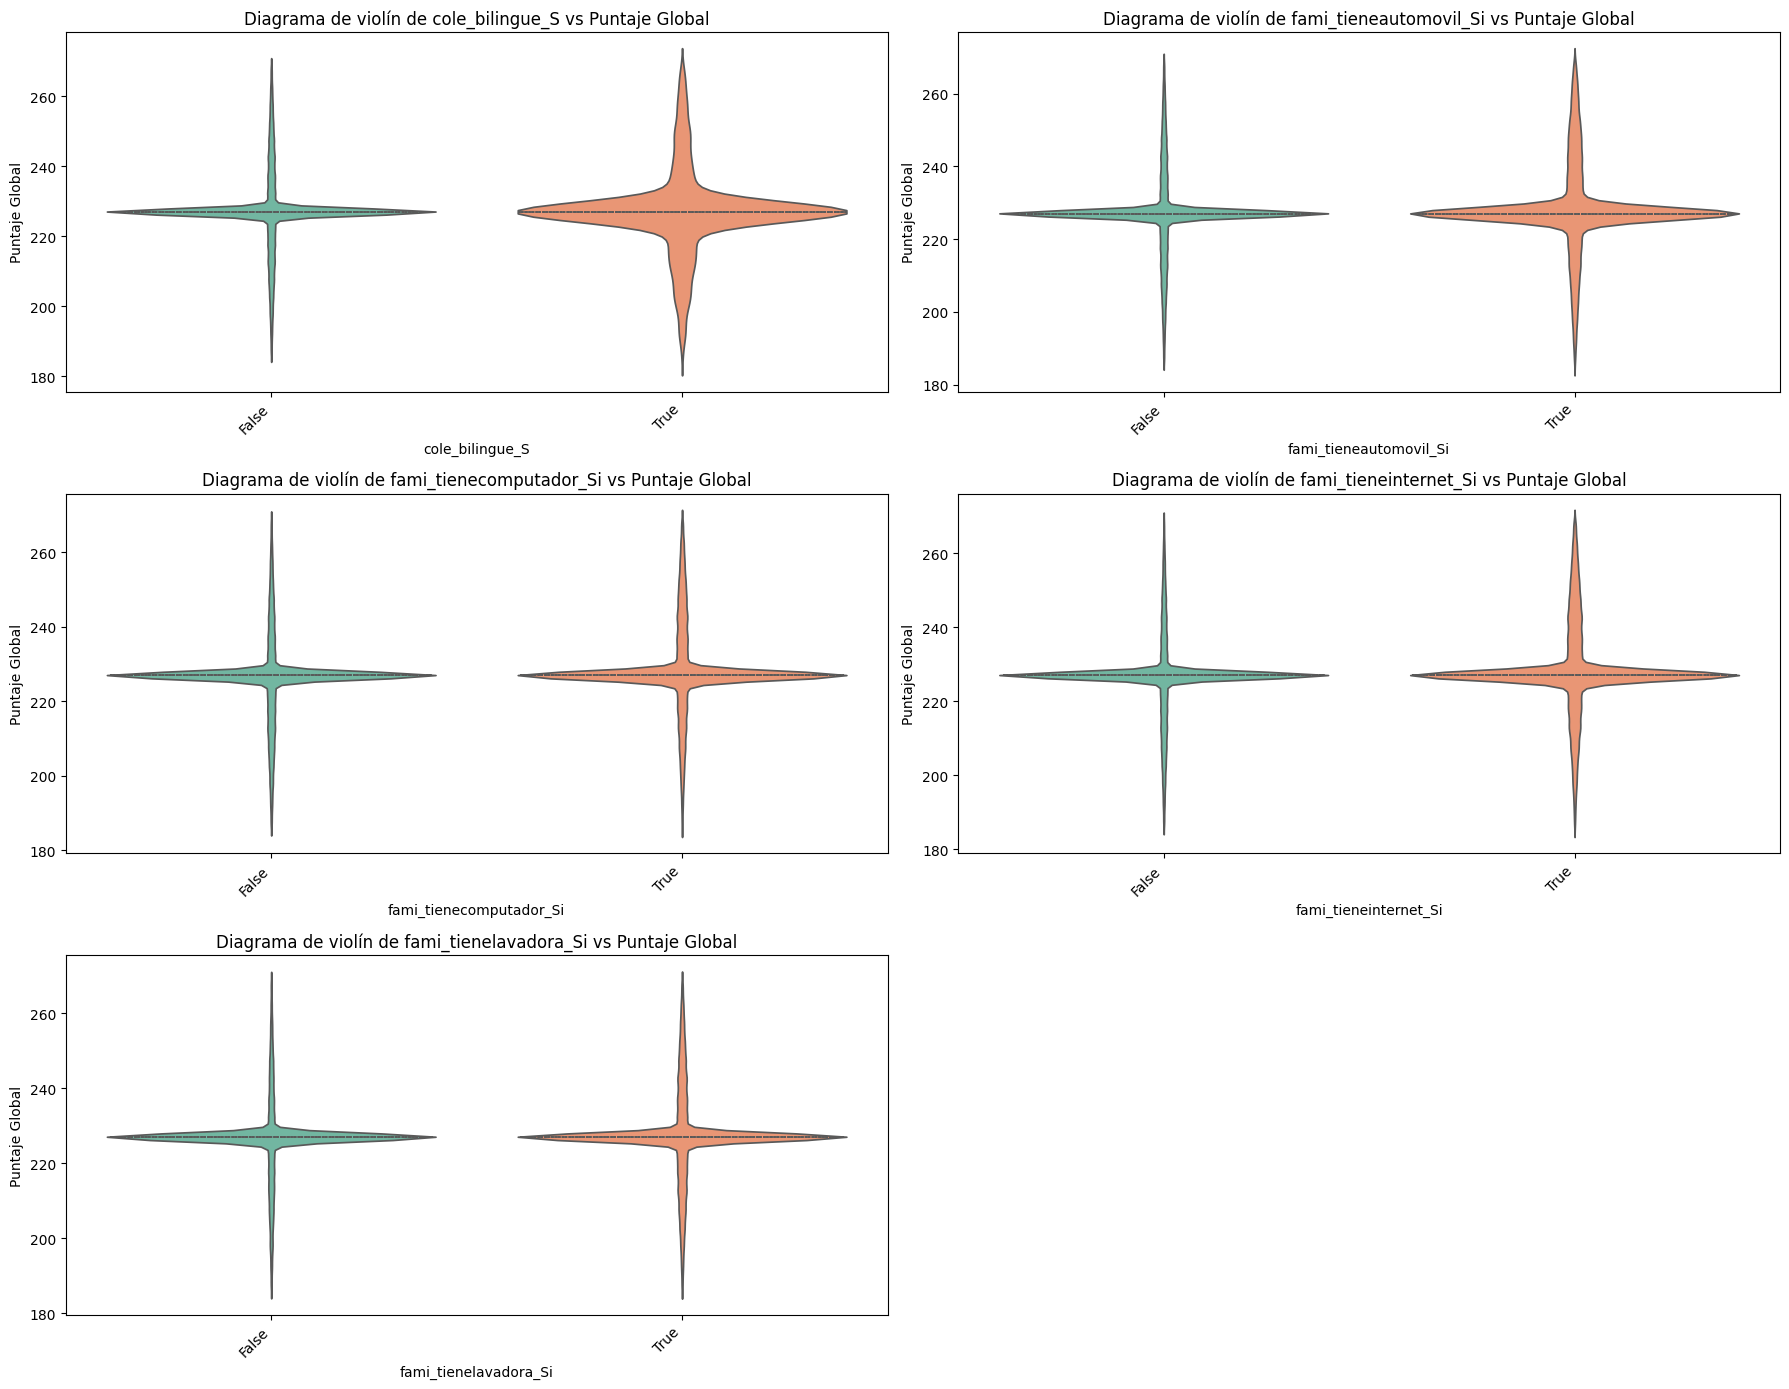

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir las variables booleanas y la variable de puntaje global
boolean_columns = [
    'cole_bilingue_S', 'fami_tieneautomovil_Si', 
    'fami_tienecomputador_Si', 'fami_tieneinternet_Si', 'fami_tienelavadora_Si'
]

# Configurar el tamaño de la figura para que no se solapen
plt.figure(figsize=(18, 14))

# Graficar un diagrama de violín para cada una de las columnas booleanas en relación al puntaje global
for i, column in enumerate(boolean_columns, 1):
    plt.subplot(3, 2, i)  # Ajustado a 3 filas y 2 columnas
    
    # Crear el diagrama de violín
    ax = sns.violinplot(x=column, y='punt_global', data=df, inner='quart', palette='Set2')

    # Establecer el título y las etiquetas
    plt.title(f'Diagrama de violín de {column} vs Puntaje Global')
    plt.xlabel(column)
    plt.ylabel('Puntaje Global')
    
    # Mejorar la legibilidad de las etiquetas si es necesario
    plt.xticks(rotation=45, ha='right')

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()


